# HR Analytics: Employee Turnover Insights
Author: Claire Lee Xiao Si

This notebook explores the features and factors influencing employee resignations. Collaborated with an industrial and organizational psychologist, the goal is to uncover actionable insights into turnover patterns, workload effects, and career progression.

### Data Attributes:
1. Employee_ID: Unique identifier replacing names for anonymity.
2. satisfaction_level: Job satisfaction score (0–1).
3. last_evaluation: Last performance evaluation score (0–1).
4. number_project: Projects assigned to an employee.
5. average_monthly_hours: Average monthly hours worked.
6. exp_in_company: Years of experience in the company.
7. work_accident: Whether the employee had a work accident (0 = no, 1 = yes).
8. left: Turnover status (0 = stayed, 1 = left).
9. promotion_last_5years: Promotion in the past 5 years (0 = no, 1 = yes).
10. role: Employee's department or position.
11. salary: Salary category (low, medium, high).



### Key Business Questions:
1. What is the employee turnover, and which department face the highest risk?
2. Do satisfaction levels and performance scores correlate with resignations?
3. Is turnover impacted by workload thresholds, promotions, or tenure?
4. Can we predict employees at risk of leaving and suggest proactive strategies?

Let’s dive into the data analysis to address these questions effectively.


In [ ]:
import pandas as pd


In [ ]:
# Load data
df = pd.read_csv('HR_dataset.csv')

In [ ]:
# Generate formatted Employee IDs (e.g., ID001, ID002, ...)
df["Employee_ID"] = [f"ID{i:03d}" for i in range(1, len(df) + 1)]

# Drop the original 'name' column to anonymize
df.drop("names", axis=1, inplace=True)

# Reorder Column
column_order = ["Employee_ID"] + [col for col in df.columns if col != "Employee_ID"]
df = df[column_order]

In [ ]:
df.sample(10)

,Employee_ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
13233,ID13234,0.96,0.89,3,142,4,0,0,0,sales,medium
8138,ID8139,0.64,0.53,4,133,3,0,0,0,support,low
1645,ID1646,0.11,0.78,6,281,4,0,1,0,technical,low
2328,ID2329,0.62,0.64,3,240,2,0,0,0,technical,medium
13922,ID13923,0.82,0.90,3,215,4,0,0,0,management,high
11817,ID11818,0.68,0.79,4,184,3,0,0,0,marketing,low
8535,ID8536,0.50,0.75,3,232,2,0,0,0,IT,medium
12919,ID12920,0.56,0.41,5,152,3,0,0,0,sales,medium
8401,ID8402,0.63,0.52,3,183,2,0,0,0,technical,low
2591,ID2592,0.21,0.61,3,173,2,0,0,0,RandD,low


In [ ]:
# Run descriptive analytics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267
std,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Select only numerical columns for correlation
Corr = df.select_dtypes(include=['number']).corr()
print(Corr)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105077       -0.142908   
last_evaluation                  0.105077         1.000000        0.349380   
number_project                  -0.142908         0.349380        1.000000   
average_monthly_hours           -0.020013         0.339770        0.417232   
exp_in_company                  -0.100803         0.131658        0.196839   
work_accident                    0.058673        -0.007135       -0.004767   
left                            -0.388225         0.006701        0.023900   
promotion_last_5years            0.025596        -0.008695       -0.006073   

                       average_monthly_hours  exp_in_company  work_accident  \
satisfaction_level                 -0.020013       -0.100803       0.058673   
last_evaluation                     0.339770        0.131658      -0.007135   
number_project                      0.417232        0.196839

<Axes: >

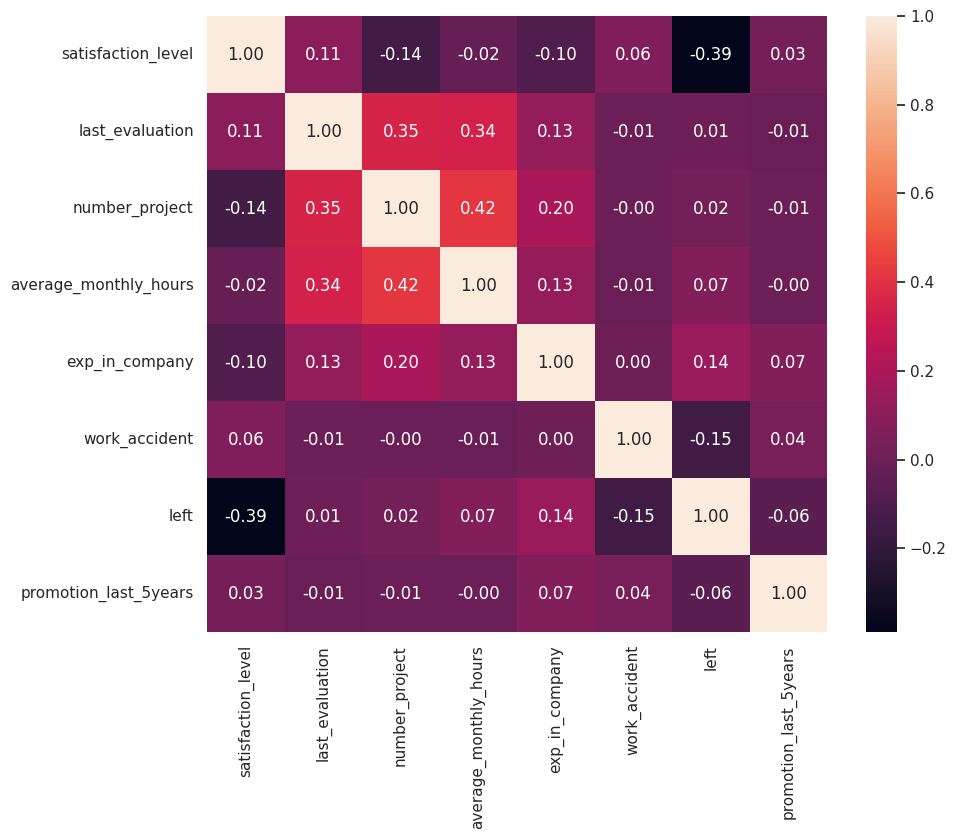

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw a Heatmap
sns.set(rc={'figure.figsize': (10,8)}) # change the figure size
sns.heatmap(Corr, annot=True, fmt=".2f")

<ipython-input-72-b9047ab4513c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="role", data=df, palette=palette)
<ipython-input-72-b9047ab4513c>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


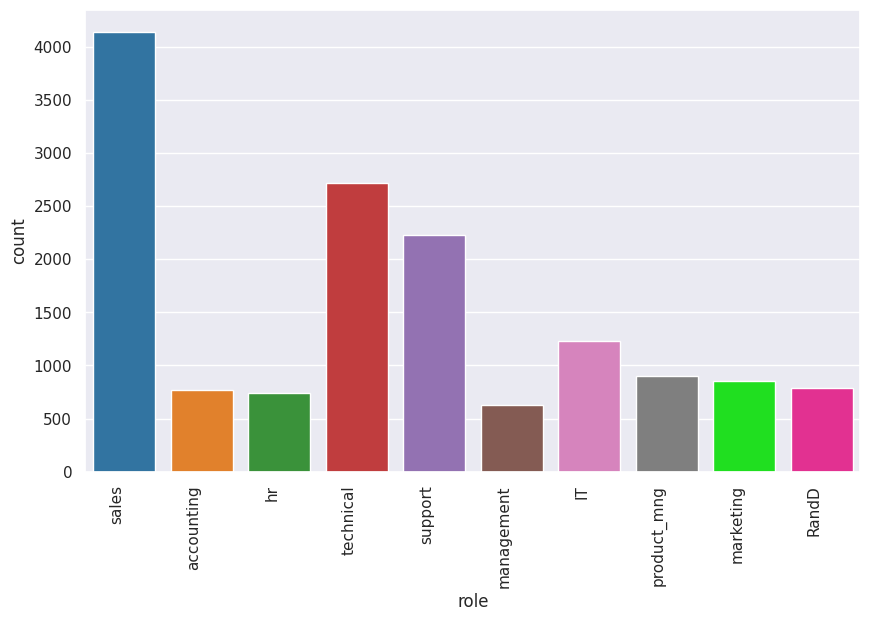

In [ ]:
# Explore Department Headcount

palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f","#00FF00","#FF1493"]
# Create the countplot with custom colors and adjusted figure size
plt.figure(figsize=(10, 6))  # Adjust width and height of the plot
ax = sns.countplot(x="role", data=df, palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


<ipython-input-73-c6541f56889f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="salary", data=df, palette=["#1f77b4", "#ff7f0e", "#8c564b"])


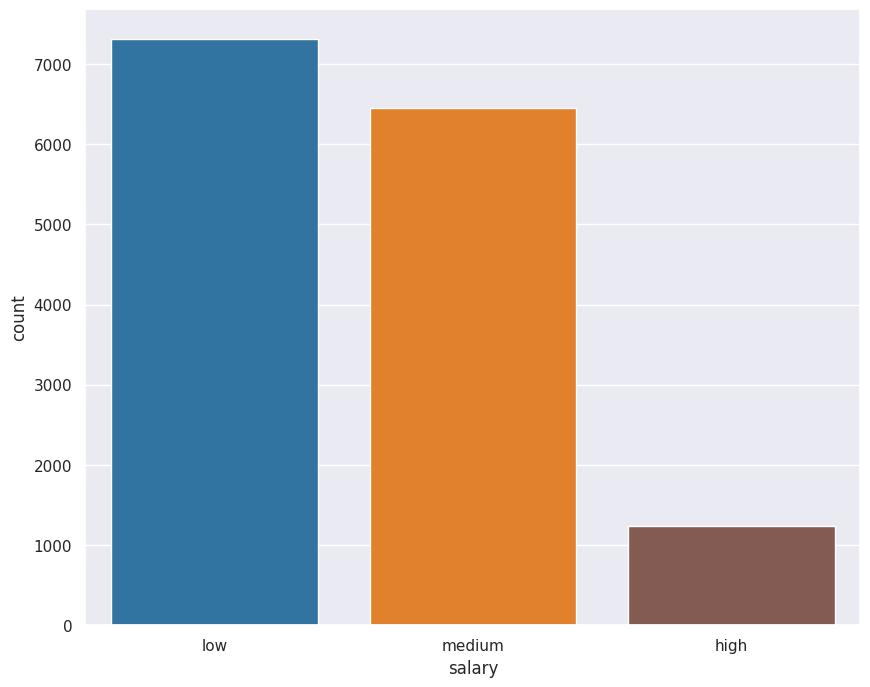

In [ ]:
# Explore Salary Category
sns.countplot(x="salary", data=df, palette=["#1f77b4", "#ff7f0e", "#8c564b"])
plt.show()

<ipython-input-74-ebf65a981418>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="number_project", data=df, palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"])


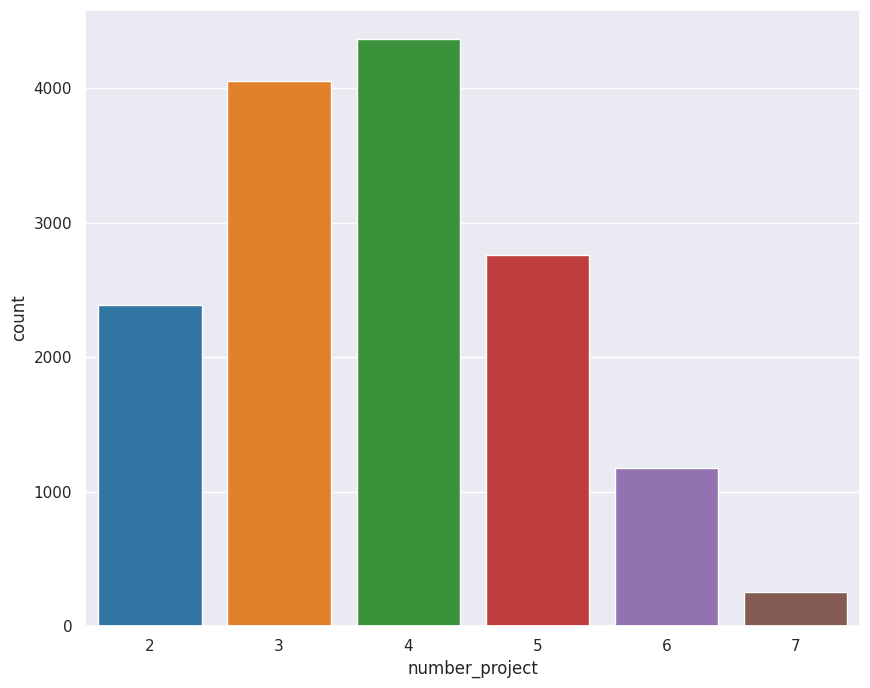

In [ ]:
# Explore Number of Projects
ax = sns.countplot(x="number_project", data=df, palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"])
plt.show()


<ipython-input-75-1a50f3f10806>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


[Text(0, 0, 'sales'),
 Text(1, 0, 'accounting'),
 Text(2, 0, 'hr'),
 Text(3, 0, 'technical'),
 Text(4, 0, 'support'),
 Text(5, 0, 'management'),
 Text(6, 0, 'IT'),
 Text(7, 0, 'product_mng'),
 Text(8, 0, 'marketing'),
 Text(9, 0, 'RandD')]

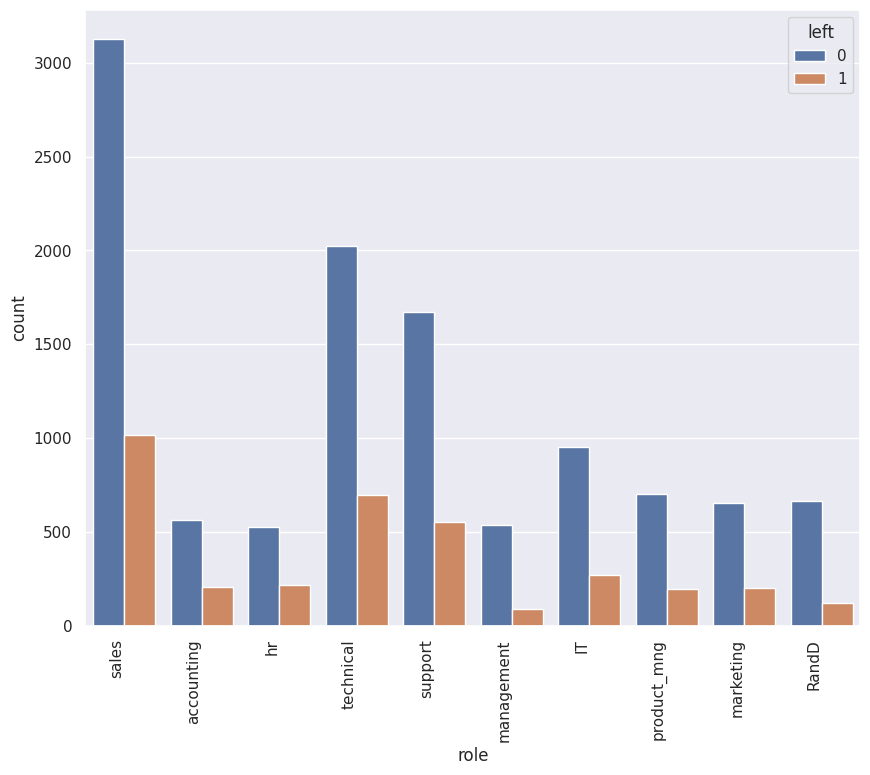

In [ ]:
# Employee Turnover by Role (Department)
ax = sns.countplot(x="role", hue="left", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

Based on the chart, the **sales department** exhibits the highest turnover rate, followed closely by the **technical and support departments**.

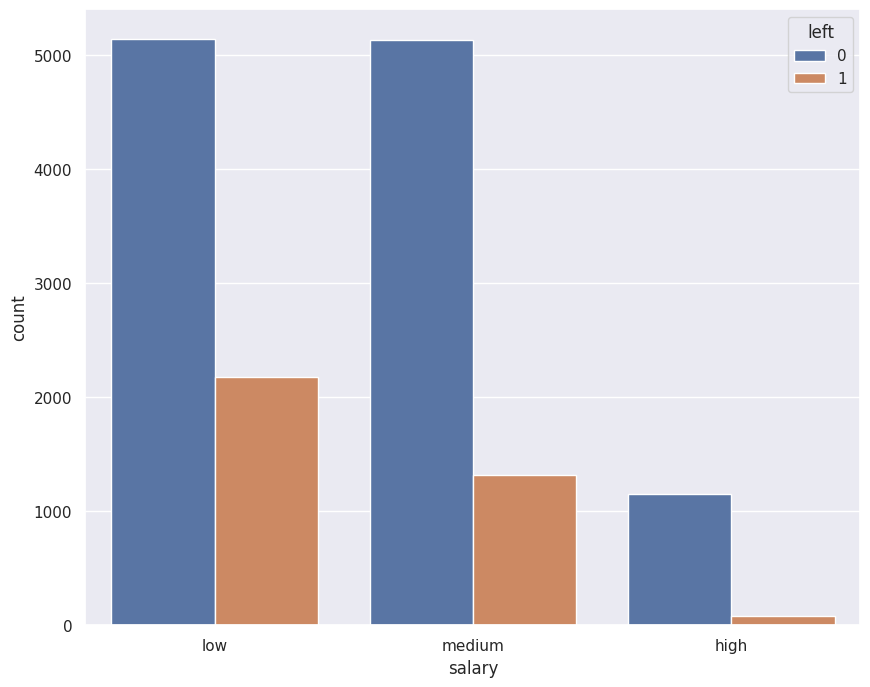

In [ ]:
# Employee Likelihood to Resign Versus Salary
ax = sns.countplot(data=df, x="salary", hue="left")

Employees with **lower salaries** tend to have a higher likelihood of leaving the company.

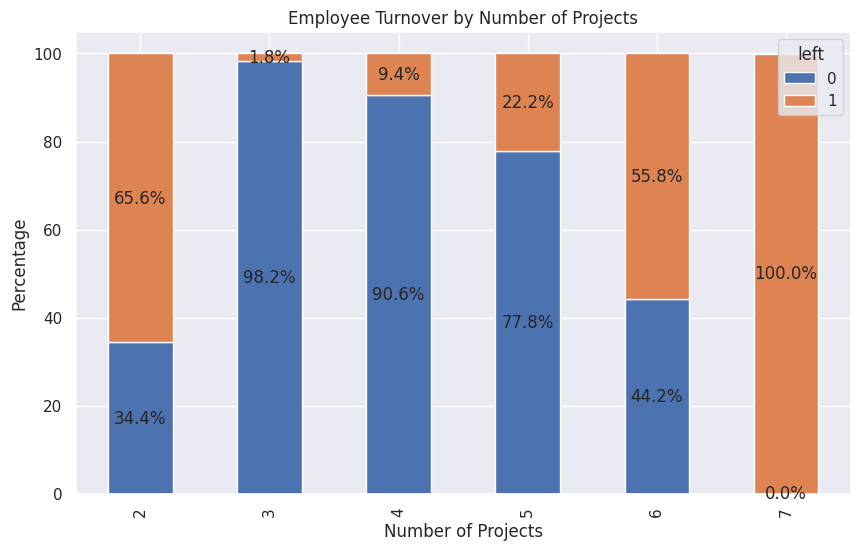

In [ ]:
# Create a stacked bar chart for Employee Turnover by Number of Projects

project_counts = df.groupby(['number_project', 'left']).size().unstack(fill_value=0)

# Calculate percentages
project_percentages = project_counts.div(project_counts.sum(axis=1), axis=0) * 100

# Create stacked bar chart
ax = project_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Number of Projects')
plt.ylabel('Percentage')
plt.title('Employee Turnover by Number of Projects')

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

Employees involved in **7 projects** experience the highest turnover at **100%**, followed by those with **2 projects** at **65.6%**. On the other hand, employees handling **3 projects** exhibit the lowest turnover rate at only **1.8%**, suggesting an ideal workload balance for retention.

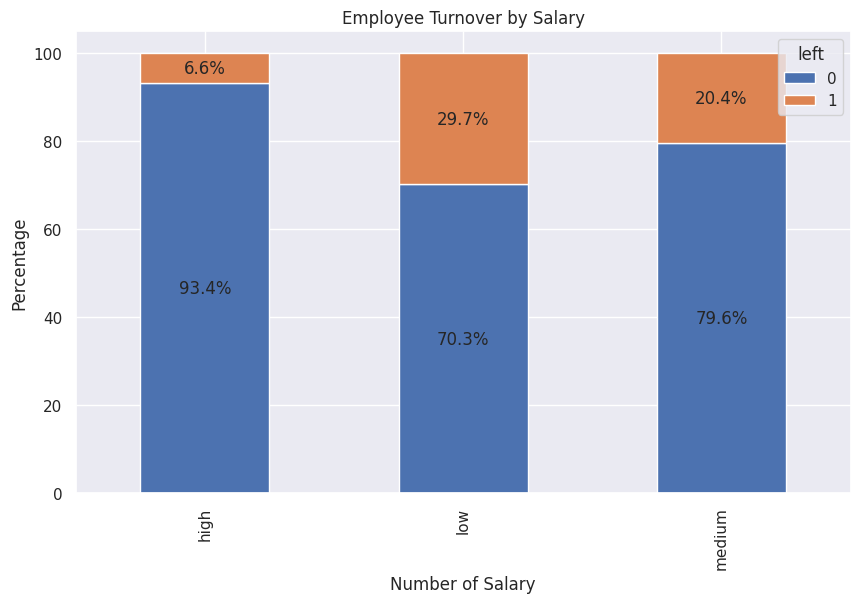

In [ ]:
# Create a stacked bar chart for Employee Turnover by Salary

project_counts = df.groupby(['salary', 'left']).size().unstack(fill_value=0)

# Calculate percentages
project_percentages = project_counts.div(project_counts.sum(axis=1), axis=0) * 100

# Create stacked bar chart
ax = project_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Number of Salary')
plt.ylabel('Percentage')
plt.title('Employee Turnover by Salary')

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()


Employees with high salaries have the lowest turnover rate at 6.6%, while those with low salaries experience the highest turnover at 29.7%. Medium salaries fall in between, with a turnover rate of 20.4%, highlighting a clear correlation between salary levels and employee retention.

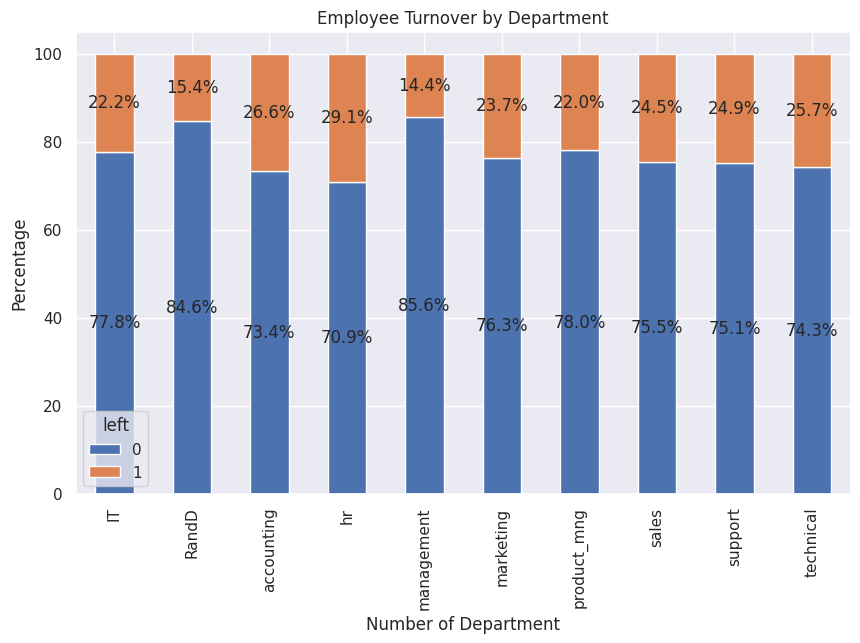

In [ ]:
# Create a stacked bar chart for Employee Turnover by Department

project_counts = df.groupby(['role', 'left']).size().unstack(fill_value=0)

# Calculate percentages
project_percentages = project_counts.div(project_counts.sum(axis=1), axis=0) * 100

# Create stacked bar chart
ax = project_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Number of Department')
plt.ylabel('Percentage')
plt.title('Employee Turnover by Department')

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

The chart reveals that the **HR department** has the **highest turnover rate at 29.1%**, followed by the a**ccounting and technical departments**. Meanwhile, **management** has the **lowest turnover rate at 14.4%**, highlighting notable retention challenges specific to certain departments.

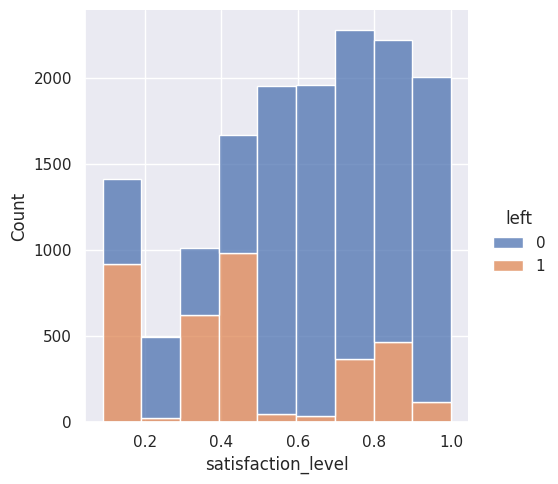

In [ ]:
# Create a distribution plot for Satisfaction Level
sns.displot(data=df, x="satisfaction_level", binwidth = 0.1,
            hue="left", multiple="stack")

The chart illustrates that employees with **low satisfaction levels (around 0.2 to 0.4)** are more likely to leave the company, as evidenced by a higher proportion of "left" cases. In contrast, employees with **satisfaction levels above 0.6** show significantly higher retention, highlighting a strong correlation between employee satisfaction and turnover rates.

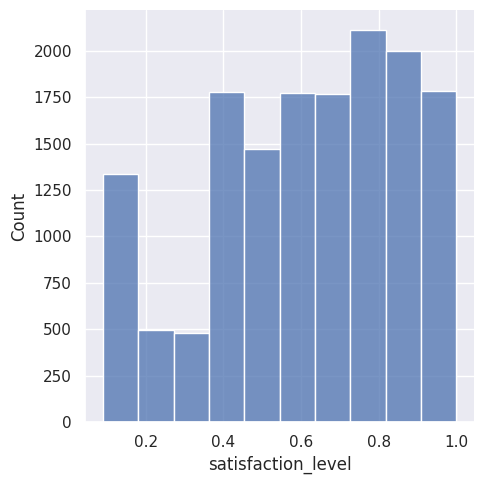

In [ ]:
# Create a distribution plot for satisfaction_level with 10 bars

sns.displot(data=df, x="satisfaction_level", bins=10)
plt.show()

This plot highlights the distribution of employee satisfaction levels. It reveals that the majority of employees have high satisfaction levels around 0.8, followed by satisfaction levels close to 1.0. Conversely, satisfaction levels around 0.2 and 0.3 have the lowest frequency, suggesting dissatisfaction is less common overall but could correlate with specific challenges or turnover trends in those groups.

# **Prediction Model: Predicting Employee Turnover**

In [ ]:
# Build Machine Learning Model
# First, let's prepare the data

features = ["satisfaction_level","exp_in_company", "number_project"]
target = "left"

X = df[features]
y = df[target]

In [ ]:
# Pick a model, in our case, we use K Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
#Split the data into 80% training 20% testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Calculate the accuracy score for our model

from sklearn.metrics import accuracy_score
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.966


Model accuracy = 96.3% means the model correctly predicted almost all the results, with a small percentage of mistakes.

In [ ]:
#Predict "satisfaction_level" of 0.2, 2 projects, 5 years in the company

new_employee = [[0.2, 2, 5]]
prediction = knn.predict(new_employee)
print("The employee is likely to leave." if prediction == 1 else "The employee is likely to stay.")

The employee is likely to stay.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


This code snippet helps with making predictions for a specific employee based on their features. This employee is more likely to stay based on the KNN Model trained earlier.

In [ ]:
# Predict which employees are likely to leave using the trained KNN model
df["left_predict"] = knn.predict(df[features])

# Filter the dataset for employees predicted to leave (left_predict = 1)
leaving_employees = df[df["left_predict"] == 1]

# Display the results with Employee_ID only (excluding names)
print("Employees more likely to leave:")
print(leaving_employees[["Employee_ID", "satisfaction_level", "exp_in_company", "number_project", "left_predict"]])


Employees more likely to leave:
      Employee_ID  satisfaction_level  exp_in_company  number_project  \
0           ID001                0.38               3               2   
1           ID002                0.80               6               5   
2           ID003                0.11               4               7   
3           ID004                0.72               5               5   
4           ID005                0.37               3               2   
...           ...                 ...             ...             ...   
14995     ID14996                0.37               3               2   
14996     ID14997                0.37               3               2   
14997     ID14998                0.11               4               6   
14998     ID14999                0.37               3               2   
14999     ID15000                0.82               5               5   

       left_predict  
0                 1  
1                 1  
2                 1  
3  

### **Employee more likely to leave**
The summary above reveals that out of 15,000 employees, **3,577 (24%)** are predicted to leave, indicating significant turnover challenges. Key factors driving resignations include low satisfaction levels, workload imbalances, and varying tenure across employees.

In [ ]:
# Calculate the total number of employees in each role
total_per_role = df.groupby("role").size()

# Calculate the number of employees predicted to leave in each role
leaving_per_role = df[df["left_predict"] == 1].groupby("role").size()

# Calculate the percentage of employees likely to leave for each role
percentage_leaving = (leaving_per_role / total_per_role * 100).sort_values(ascending=False)

# Display the results
print("Percentage of employees likely to leave by role:")
print(percentage_leaving)


Percentage of employees likely to leave by role:
role
hr             28.010825
accounting     26.075619
technical      25.909592
support        25.347690
sales          24.130435
marketing      23.892774
product_mng    22.949002
IT             22.738386
RandD          15.628971
management     13.809524
dtype: float64


# **Conclusion**
To answer the business questions:
1. Employee turnover is predicted at 24%, with the HR department facing the highest risk at 28%, followed by accounting (26%) and technical roles (25.9%).

2. Low satisfaction levels strongly correlate with resignations, while performance scores show a weaker correlation.

3. Employees with 2 or 7 projects experience higher turnover compared to those handling 3 projects. Promotions reduce turnover risk, while mid-tenure employees (3–5 years) face higher turnover rates.

4. Employees at risk can be predicted using KNN models. Strategies like improving satisfaction, balancing workloads, and focusing on high-risk departments can help mitigate turnover.

